# <span style=color:blue><b>SPRINT 6 - Tarea M6 T01</b></span>  

 - **Ejercicios para practicar regresiones.**
 - **A partir de un dataset con información sobre las viviendas de Houston.**  

**LOADING DATA:**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Open the choosen file
BasePath = "C:/Users/Pepo/Desktop/Data Science/Barcelona Activa"
Archivo = BasePath + "/Sprint 5. Introducción al Test de Hipótesis y al Machine Learning"

df = pd.read_csv(Archivo + '/Tarea 2_ViviendasHouston/housing data.csv', 
                header = None, 
                 names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", 
                          "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"])

**READING DATA:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Attribute Information:**  
  
    1. CRIM         per capita crime rate by town  
    2. ZN           proportion of residential land zoned for lots over 25,000 sq.ft.  
    3. INDUS        proportion of non-retail business acres per town  
    4. CHAS         Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
    5. NOX          nitric oxides concentration (parts per 10 million)  
    6. RM           average number of rooms per dwelling  
    7. AGE          proportion of owner-occupied units built prior to 1940  
    8. DIS          weighted distances to five Boston employment centres  
    9. RAD          index of accessibility to radial highways  
    10. TAX         full-value property-tax rate per $10,000  
11. PTRATIO     pupil-teacher ratio by town  
12. B           1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
13. LSTAT       % lower status of the population  
14. MEDV        Median value of owner-occupied homes in $1000's

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<Figure size 1440x720 with 0 Axes>

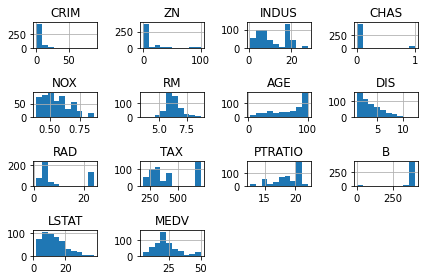

In [6]:
plt.figure(figsize = (20,10))
df.hist()
plt.tight_layout() # para que no se superpongan las graficas

**NOTA:** Analizando la tabla estadística y los histogramas, se concluye que la mayoría de las variables contienen outliers. Esta información es de utilidad al momento de realizar el pre-procesado de los datos y escalar los mismos.

**PREPOCESSING THE DATA:**

- Las variables independientes denominados "X", corresponden a todas las columnas del dataframe "df", eliminando la última columna que corresponde a la variable dependiente "y" denominada MEDV (Median value of owner-occupied homes in $1000's). 

In [7]:
# Create arrays
data = df.values

# split into inputs and outputs
X, y = data[:, :-1], data[:, -1]
print("Shape X:", X.shape,"\nShape y:", y.shape)

Shape X: (506, 13) 
Shape y: (506,)


 - **Scaling data with outliers:**  
Si sus datos contienen muchos valores atípicos, es probable que escalar utilizando la media y la varianza de los datos no funcione muy bien. En estos casos, puede usar **RobustScaler** como reemplazo directo. Utiliza estimaciones más sólidas para el centro y el rango de sus datos.

In [8]:
#Scale
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)

**TRAINING AND TEST SPLIT DATA:**

- La evaluación, se realiza dividiendo los datos de la siguiente manera: 80% Train y 20% Test.

In [9]:
# train-test split evaluation 
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=1)
print("Shape X_train:", X_train.shape, "\nShape X_test:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)

Shape X_train: (404, 13) 
Shape X_test: (102, 13) 
Shape y_train: (404,) 
Shape y_test: (102,)


## <span style=color:red><b>Ejercicio 1</b></span>
<span style=color:blue><b><i>Crea al menos dos modelos de regresión distintos para intentar predecir lo mejor posible el precio de las viviendas (MEDV) del archivo adjunto.</i></b></span>

**MODEL 1: *LINEAR REGRESSION***

In [10]:
# Import required libraries
from sklearn import linear_model

# Import necessary modules
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_1 = linear_model.LinearRegression()

# Train the model
model_1.fit(X_train,y_train)

# make predictions
yhat_m1 = model_1.predict(X_test)

# evaluate predictions
r2_1 = r2_score(y_test, yhat_m1)
mse_1 = mean_squared_error(y_test, yhat_m1)
mae_1 = mean_absolute_error(y_test, yhat_m1)

print('R2: %.3f' % r2_1)
print('MSE: %.3f' % mse_1)
print('MAE: %.3f' % mae_1)

R2: 0.763
MSE: 23.381
MAE: 3.751


**MODEL 2: *RANDOM FOREST REGRESSION***

In [11]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor

# Model
model_2 = RandomForestRegressor(random_state= 1)

# Train the model
model_2.fit(X_train, y_train)

# make predictions
yhat_m2 = model_2.predict(X_test)

# evaluate predictions
r2_2 = r2_score(y_test, yhat_m2)
mse_2 = mean_squared_error(y_test, yhat_m2)
mae_2 = mean_absolute_error(y_test, yhat_m2)

print('R2: %.3f' % r2_2)
print('MSE: %.3f' % mse_2)
print('MAE: %.3f' % mae_2)

R2: 0.910
MSE: 8.912
MAE: 2.351


**MODEL 3: *NEURAL NETWORK REGRESSION***

Nota: se incrementa el número de max_iter = 700 (default = 200) ya que obtenemos un mensaje de aviso que el modelo no converge.

In [12]:
# Import required libraries
from sklearn.neural_network import MLPRegressor

#model
model_3 = MLPRegressor(hidden_layer_sizes=(13,13,13), random_state=1, max_iter=700)

# Train the model
model_3.fit(X_train,y_train)

# make predictions
yhat_m3 = model_3.predict(X_test)

# evaluate predictions
r2_3 = r2_score(y_test, yhat_m3)
mse_3 = mean_squared_error(y_test, yhat_m3)
mae_3 = mean_absolute_error(y_test, yhat_m3)

print('R2: %.3f' % r2_3)
print('MSE: %.3f' % mse_3)
print('MAE: %.3f' % mae_3)

R2: 0.858
MSE: 14.060
MAE: 2.882


## <span style=color:red><b>Ejercicio 2</b></span>
<span style=color:blue><b><i>Comparar los resultados en base al MSE y al R2.</i></b></span>

In [13]:
results = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest','Neural Network'],
                        'R2': [r2_1, r2_2, r2_3], 
                        'MSE': [mse_1, mse_2, mse_3], 
                        'MAE': [mae_1, mae_2, mae_3]})
results.round(3)

,Model,R2,MSE,MAE
0,Linear Regression,0.763,23.381,3.751
1,Random Forest,0.910,8.912,2.351
2,Neural Network,0.858,14.060,2.882


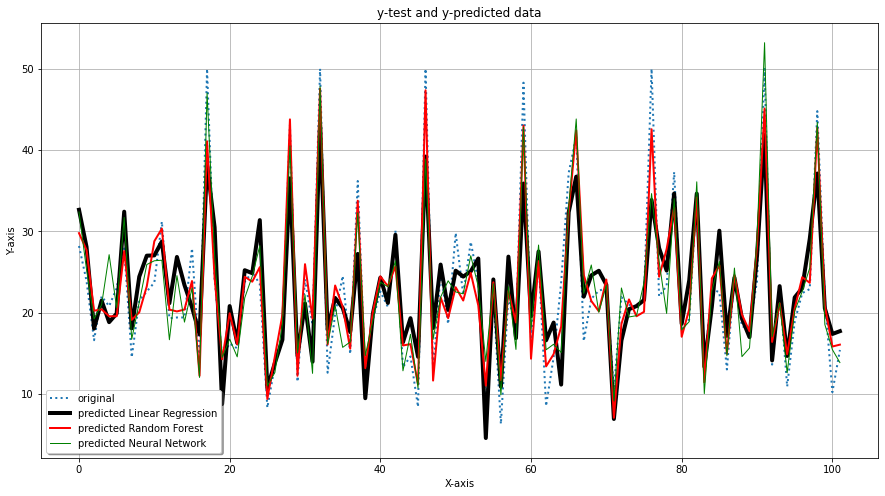

In [14]:
plt.figure(figsize = (15,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=2, label="original", ls=":")
plt.plot(x_ax, yhat_m1, linewidth=4., label="predicted Linear Regression", c="black")
plt.plot(x_ax, yhat_m2, linewidth=2, label="predicted Random Forest", c="red")
plt.plot(x_ax, yhat_m3, linewidth=1, label="predicted Neural Network", c="green")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

Como se puede observar tanto en la tabla de resultados, como en la gráfica anterior, el modelo que predice mejores resultados es **Random Forest**, con un valor de **R2: 0.91** (el valor más cercano a 1), y a la vez un valor de **MSE: 8.91** (el menor error de los modelos comparados, igual que el MAE).

## <span style=color:red><b>Ejercicio 3</b></span>
<span style=color:blue><b><i>Entrenarlos utilizando los diferentes parámetros que se admiten para intentar mejorar su predicción.</i></b></span>

## TUNING THE HYPER-PARAMETERS OF AN ESTIMATOR
https://scikit-learn.org/stable/modules/grid_search.html# 

A search consists of:
- an estimator (regressor or classifier);
- a parameter space;
- a method for searching or sampling candidates;
- a cross-validation scheme; and
- a score function.

**MODEL 1: *LINEAR REGRESSION***

In [15]:
#Estimator
model_1.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [49]:
#Parameter search
from sklearn.model_selection import GridSearchCV

#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid = dict()
param_grid['copy_X'] = [True, False]
param_grid['fit_intercept'] = [True, False]
param_grid['normalize'] = [True, False]

#Model without fit
model_11 = linear_model.LinearRegression()

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used, by default cv = 5. 

search = GridSearchCV(model_11, param_grid, scoring = 'neg_mean_absolute_error', n_jobs = -1)

# Considerando que la función ·GridSearchCV· realiza by default CV, usamos los DATOS COMPLETOS.
result = search.fit(scaled_X, y)

print('Best Hyper-parameters: ', result.best_params_)

Best Hyper-parameters:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}


- Repetimos la predicción con los HYPER-PARAMETERS y analizamos los resultados

In [50]:
model_1hp = linear_model.LinearRegression(normalize = True)
model_1hp.fit(X_train,y_train)

# make predictions
yhat_m1hp = model_1hp.predict(X_test)

# evaluate predictions
r2_1hp = r2_score(y_test, yhat_m1hp)
mse_1hp = mean_squared_error(y_test, yhat_m1hp)
mae_1hp = mean_absolute_error(y_test, yhat_m1hp)

print('R2: %.3f' % r2_1hp)
print('MSE: %.3f' % mse_1hp)
print('MAE: %.3f' % mae_1hp)

R2: 0.763
MSE: 23.381
MAE: 3.751


**MODEL 2: *RANDOM FOREST REGRESSION***

In [18]:
model_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [51]:
#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid2 = dict()
param_grid2['max_depth'] = [None, 2, 3, 5]
param_grid2['n_estimators'] = [10, 50, 75, 100, 125, 150, 175, 200]
param_grid2['oob_score'] = [True, False]

# Model without fit 
model_22 = RandomForestRegressor(random_state= 1)

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used. 

search2 = GridSearchCV(model_22, param_grid2, scoring = 'neg_mean_absolute_error', n_jobs = -1)

# Considerando que la función ·GridSearchCV· realiza by default CV, usamos los DATOS COMPLETOS.
result2 = search2.fit(scaled_X, y)

print('Best Hyper-parameters: ', result2.best_params_)

Best Hyper-parameters:  {'max_depth': None, 'n_estimators': 150, 'oob_score': True}


- Repetimos la predicción con los HYPER-PARAMETERS y analizamos los resultados

In [52]:
# fit the model
model_2hp = RandomForestRegressor(random_state= 1, n_estimators = 150, oob_score = True)
model_2hp.fit(X_train, y_train)

# make predictions
yhat_m2hp = model_2hp.predict(X_test)

# evaluate predictions
r2_2hp = r2_score(y_test, yhat_m2hp)
mse_2hp = mean_squared_error(y_test, yhat_m2hp)
mae_2hp = mean_absolute_error(y_test, yhat_m2hp)

print('R2: %.3f' % r2_2hp)
print('MSE: %.3f' % mse_2hp)
print('MAE: %.3f' % mae_2hp)

R2: 0.913
MSE: 8.616
MAE: 2.325


**MODEL 3: *NEURAL NETWORK REGRESSION***

In [21]:
model_3.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (13, 13, 13),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 700,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [55]:
#param_grid: 
    #dict or list of dictionaries, with parameters names (str)
param_grid3 = dict()
param_grid3['activation'] = ["identity", "logistic", "tanh", "relu"]
param_grid3['solver'] = ["adam", "lbfgs"]
param_grid3['max_iter'] = [700, 1000, 3000, 5000, 10000, 15000]
param_grid3['warm_start'] = [True, False]

#model without fit
model_33 = MLPRegressor(hidden_layer_sizes=(13,13,13), random_state=1)

# cross validator (cv): 
    #For integer/None inputs, if the estimator is a classifier and y 
    #is either binary or multiclass, StratifiedKFold is used.
    #In all other cases, KFold is used. 

search3 = GridSearchCV(model_33, param_grid3, scoring = 'neg_mean_absolute_error', n_jobs = -1)

# Considerando que la función ·GridSearchCV· realiza by default CV, usamos los DATOS COMPLETOS.
result3 = search3.fit(scaled_X, y)

print('Best Hyper-parameters: ', result3.best_params_)

Best Hyper-parameters:  {'activation': 'logistic', 'max_iter': 3000, 'solver': 'adam', 'warm_start': True}


C:\Users\Pepo\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


- Repetimos la predicción con los Hyper-Parameters y analizamos los resultados, dado que las max_iter no convergen, se incrementa su valor.

In [56]:
model_3hp = MLPRegressor(hidden_layer_sizes=(13,13,13), activation='logistic', solver='adam', random_state=1, 
                        max_iter=15000, warm_start=True )
model_3hp.fit(X_train,y_train)

# make predictions
yhat_m3hp = model_3hp.predict(X_test)

# evaluate predictions
r2_3hp = r2_score(y_test, yhat_m3hp)
mse_3hp = mean_squared_error(y_test, yhat_m3hp)
mae_3hp = mean_absolute_error(y_test, yhat_m3hp)

print('R2: %.3f' % r2_3hp)
print('MSE: %.3f' % mse_3hp)
print('MAE: %.3f' % mae_3hp)

R2: 0.759
MSE: 23.815
MAE: 3.433


In [57]:
resultsHP = pd.DataFrame({'Model': ['Linear Regression H-P', 'Random Forest H-P','Neural Network H-P'],
                        'R2': [r2_11, r2_22, r2_33], 
                        'MSE': [mse_11, mse_22, mse_33], 
                        'MAE': [mae_11, mae_22, mae_33]})

pd.concat([results, resultsHP], axis=0)

,Model,R2,MSE,MAE
0,Linear Regression,0.763417,23.380836,3.750712
1,Random Forest,0.909827,8.911551,2.350569
2,Neural Network,0.857733,14.059845,2.882492
0,Linear Regression H-P,0.763417,23.380836,3.750712
1,Random Forest H-P,0.912815,8.616296,2.324673
2,Neural Network H-P,0.759024,23.815058,3.432954


**R:** Como observamos en la tabla de resultados, una vez aplicados los "Hyper-Parameters", se concluye lo siguiente:  
 - El modelo #1: "Linear Regression" no sufre **ningún cambio.**
 - El modelo #2: "Random Forest" tiene una **pequeña mejoría** en R2, MSE y MAE.
 - El modelo #3: "Neural Network" **empeora** los resultados, muy posible a la función de activación utilizada.
 - Random Forest continúa siendo el **mejor modelo**.

## <span style=color:red><b>Ejercicio 4</b></span>
<span style=color:blue><b><i>Compara su rendimiento utilizando la aproximación train/test o utilizando todos los datos (validación interna).</i></b></span>

**CROSS-VALIDATION:**  
- Se realiza este procedimiento con los modelos que contienen los HYPER-PARAMETERS.
- Por ser CV, se utilizan TODOS LOS DATOS.
- cv=7 obtiene los mejores resultados.

In [71]:
from sklearn.model_selection import cross_validate

scoring = ['r2', 'neg_mean_squared_error', "neg_mean_absolute_error"]

#Model 1:
model_1cv = linear_model.LinearRegression()
scores_1 = cross_validate(model_1cv, scaled_X, y, scoring=scoring, cv=7)

pd.DataFrame(scores_1).mean()

fit_time                         0.001140
score_time                       0.000997
test_r2                          0.450594
test_neg_mean_squared_error    -37.287231
test_neg_mean_absolute_error    -3.977511
dtype: float64

In [80]:
#Model 2: 
model_2cv = RandomForestRegressor(random_state= 1, n_estimators = 150, oob_score = True)
scores_2 = cross_validate(model_2cv, scaled_X, y, scoring=scoring, cv=7)

pd.DataFrame(scores_2).mean()

fit_time                         0.417740
score_time                       0.011826
test_r2                          0.649578
test_neg_mean_squared_error    -22.123038
test_neg_mean_absolute_error    -3.047351
dtype: float64

In [87]:
#Model 3: 
model_3cv = MLPRegressor(hidden_layer_sizes=(13,13,13), activation='logistic', solver='adam', random_state=1, 
                        max_iter=15000, warm_start=True)
scores_3 = cross_validate(model_3cv, scaled_X, y, scoring=scoring, cv=7)

pd.DataFrame(scores_3).mean()

fit_time                         6.698635
score_time                       0.001145
test_r2                          0.602898
test_neg_mean_squared_error    -23.388199
test_neg_mean_absolute_error    -3.069601
dtype: float64

**Como se oserva en la siguiente tabla, 

In [88]:
scores_1['test_neg_mean_squared_error'].mean()

resultsCV = pd.DataFrame({'Model': ['Linear Regression CV', 'Random Forest CV','Neural Network CV'],
                        'R2': [scores_1['test_r2'].mean(), scores_2['test_r2'].mean(), scores_3['test_r2'].mean()], 
                        'MSE': [scores_1['test_neg_mean_squared_error'].mean(), scores_2['test_neg_mean_squared_error'].mean(), scores_3['test_neg_mean_squared_error'].mean()], 
                        'MAE': [ scores_1['test_neg_mean_absolute_error'].mean(),  scores_2['test_neg_mean_absolute_error'].mean(),  scores_3['test_neg_mean_absolute_error'].mean()]})

pd.concat([results, resultsHP, resultsCV], axis=0)

,Model,R2,MSE,MAE
0,Linear Regression,0.763417,23.380836,3.750712
1,Random Forest,0.909827,8.911551,2.350569
2,Neural Network,0.857733,14.059845,2.882492
0,Linear Regression H-P,0.763417,23.380836,3.750712
1,Random Forest H-P,0.912815,8.616296,2.324673
2,Neural Network H-P,0.759024,23.815058,3.432954
0,Linear Regression CV,0.450594,-37.287231,-3.977511
1,Random Forest CV,0.649578,-22.123038,-3.047351
2,Neural Network CV,0.602898,-23.388199,-3.069601


**R:** 
- Para los modelos de **"Linear Regression" y "Random Forest"**, los mejores resultados, se obtuvieron con los **hyper-parameters**, esto no ocurrió con "Neural Network", por tratarse de un modelo más complejo.
- El CV realizado a los modelos que contienen los Hyper-Parameters, muestra **resultados diferentes y con mayor error**, que al hacerlos con el conjunto de datos divididos en train-test, esto se debe al sesgo y los outliers que contienen las variables, ya que se uso un modelo nuevo en cada caso para controlar que no exista overfitting.

## <span style=color:red><b>Ejercicio 5</b></span>
<span style=color:blue><b><i>No utilices la variable del número de habitaciones (RM) a la hora de realizar predicciones.</i></b></span>

Se plantea utilizar los modelos iniciales (1,2,3), que en promedio tienen mejores predicciones para comparar los resultados sin "RM".

In [113]:
#copy scaled_X
X_new = scaled_X.copy()

#delete RM column
X_new = np.delete(X_new, 5, axis=1)

In [117]:
# split into train test sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state=1)
print("Shape X_train_new:", X_train.shape, "\nShape X_test_new:", X_test.shape, 
      "\nShape y_train:", y_train.shape, "\nShape y_test:",y_test.shape)

Shape X_train_new: (404, 12) 
Shape X_test_new: (102, 12) 
Shape y_train: (404,) 
Shape y_test: (102,)


**MODEL 1: *LINEAR REGRESSION***

In [118]:
model_1_new = linear_model.LinearRegression()

# Train the model
model_1_new.fit(X_train_new,y_train)

# make predictions
yhat_m1_new = model_1_new.predict(X_test_new)

# evaluate predictions
r2_1new = r2_score(y_test, yhat_m1_new)
mse_1new = mean_squared_error(y_test, yhat_m1_new)
mae_1new = mean_absolute_error(y_test, yhat_m1_new)

print('R2: %.3f' % r2_1new)
print('MSE: %.3f' % mse_1new)
print('MAE: %.3f' % mae_1new)

R2: 0.676
MSE: 32.051
MAE: 4.247


**MODEL 2: *RANDOM FOREST REGRESSION***

In [119]:
# Model
model_2_new = RandomForestRegressor(random_state= 1)

# Train the model
model_2_new.fit(X_train_new, y_train)

# make predictions
yhat_m2_new = model_2_new.predict(X_test_new)

# evaluate predictions
r2_2new = r2_score(y_test, yhat_m2_new)
mse_2new = mean_squared_error(y_test, yhat_m2_new)
mae_2new = mean_absolute_error(y_test, yhat_m2_new)

print('R2: %.3f' % r2_2new)
print('MSE: %.3f' % mse_2new)
print('MAE: %.3f' % mae_2new)

R2: 0.837
MSE: 16.148
MAE: 2.960


**MODEL 3: *NEURAL NETWORK REGRESSION***

In [120]:
#model
model_3_new = MLPRegressor(hidden_layer_sizes=(13,13,13), random_state=1, max_iter=700)

# Train the model
model_3_new.fit(X_train_new,y_train)

# make predictions
yhat_m3_new = model_3_new.predict(X_test_new)

# evaluate predictions
r2_3new = r2_score(y_test, yhat_m3_new)
mse_3new = mean_squared_error(y_test, yhat_m3_new)
mae_3new = mean_absolute_error(y_test, yhat_m3_new)

print('R2: %.3f' % r2_3new)
print('MSE: %.3f' % mse_3new)
print('MAE: %.3f' % mae_3new)

R2: 0.735
MSE: 26.225
MAE: 3.924


In [122]:
results_new = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest','Neural Network'],
                        'R2': [r2_1new, r2_2new, r2_3new], 
                        'MSE': [mse_1new, mse_2new, mse_3new], 
                        'MAE': [mae_1new, mae_2new, mae_3new]})

pd.concat([results, results_new], axis=0)

,Model,R2,MSE,MAE
0,Linear Regression,0.763417,23.380836,3.750712
1,Random Forest,0.909827,8.911551,2.350569
2,Neural Network,0.857733,14.059845,2.882492
0,Linear Regression,0.675685,32.051172,4.246684
1,Random Forest,0.836603,16.148081,2.960147
2,Neural Network,0.734642,26.224613,3.924442


Con los resultados presentados en la tabla anterior, se observa que el NO uso del número de habitaciones (RM) a la hora de realizar predicciones, tiene un **gran impacto** en los resultados, **afectando a la calidad de las predicciones**, en otras palabras, la variable eliminada es de importancia/ peso para predecir el precio de las viviendas.